Ontology graph has been successfully generated and saved as 'school_ontology.png'


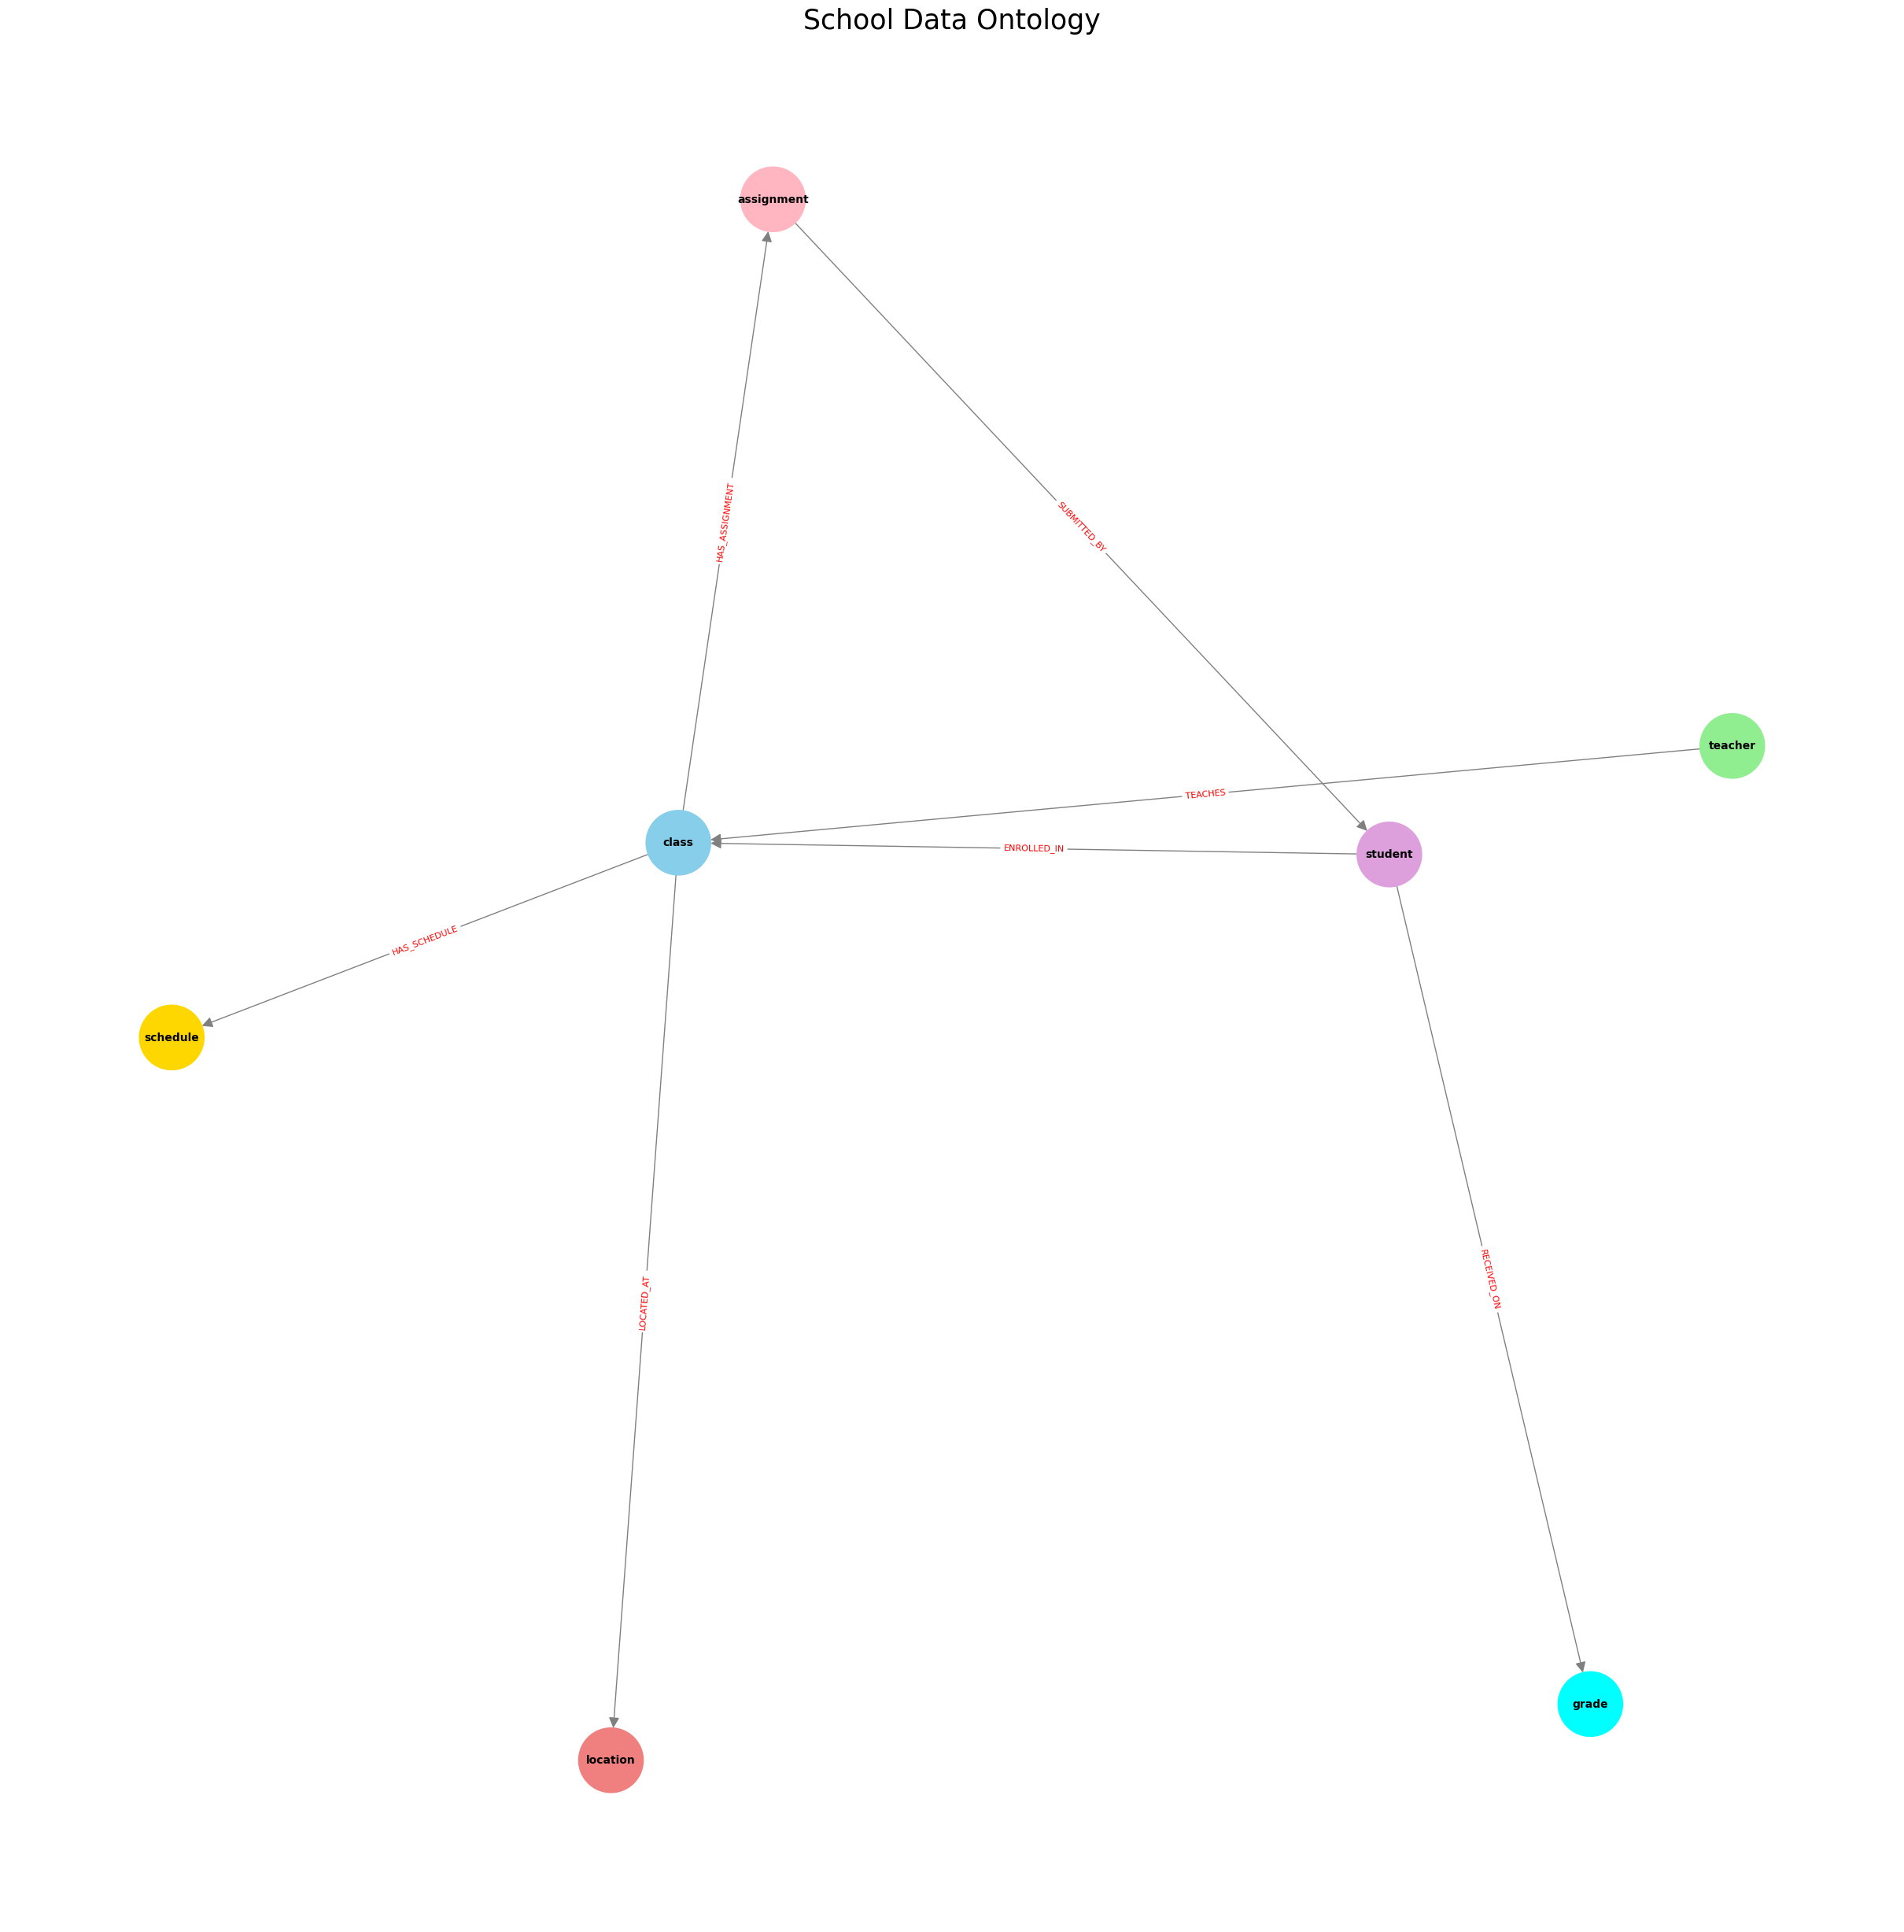

In [6]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import io



# Load data into pandas DataFrames from the string data
classes_df = pd.read_csv('data/classes_schedules.csv')
grades_df = pd.read_csv('data/grades_assignments.csv')

# Create a directed graph
G = nx.DiGraph()

# --- Step 1: Add Nodes and Edges from the Classes Data ---
# for _, row in classes_df.iterrows():
    # class_name = row['class_name']
    # teacher_name = row['teacher_name']
    # location = f"{row['building']}\n{row['room_number']}"
    # schedule = row['class_time']
    
    # Add nodes with attributes
G.add_node('class', type='Class')
G.add_node('teacher', type='Teacher')
G.add_node('location', type='Location')
G.add_node('schedule', type='Schedule')

# Add edges defining relationships
G.add_edge('teacher', 'class', label='TEACHES')
G.add_edge('class', 'location', label='LOCATED_AT')
G.add_edge('class', 'schedule', label='HAS_SCHEDULE')

# --- Step 2: Add Nodes and Edges from the Grades Data ---
# for _, row in grades_df.iterrows():
    # student_name = row['student_name']
    # class_name = row['class_name']
    # assignment_name = row['assignment_name']
    # grade = f"Grade: {row['letter_grade']}"
    
# Add nodes with attributes
G.add_node('student', type='Student')
G.add_node('assignment', type='Assignment')
G.add_node('grade', type='Grade')

# Add edges defining relationships
G.add_edge('student', 'class', label='ENROLLED_IN')
G.add_edge('class', 'assignment', label='HAS_ASSIGNMENT')
G.add_edge('assignment', 'student', label='SUBMITTED_BY')
G.add_edge('student', 'grade', label='RECEIVED_ON', assignment='assignment')

# --- Step 3: Visualize the Ontology ---
plt.figure(figsize=(24, 24))

# Use a layout that spreads nodes out
pos = nx.spring_layout(G, k=1.5, iterations=50, seed=42)

# Define colors for each node type for better readability
node_colors = {
    'Class': 'skyblue',
    'Teacher': 'lightgreen',
    'Location': 'lightcoral',
    'Schedule': 'gold',
    'Student': 'plum',
    'Assignment': 'lightpink',
    'Grade': 'cyan'
}
# Assign colors to nodes based on their 'type' attribute
colors = [node_colors.get(G.nodes[n]['type'], 'grey') for n in G.nodes()]

# Draw the graph nodes and labels
nx.draw(G, pos, with_labels=True, node_size=3500, node_color=colors, 
        font_size=10, font_weight='bold', arrowsize=20, edge_color='gray')

# Draw the edge labels (relationships)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, 
                           font_color='red', font_size=8, font_family='sans-serif')

plt.title("School Data Ontology", size=25)
# Save the figure to a file
plt.savefig("school_ontology.png", format="PNG", dpi=300)

print("Ontology graph has been successfully generated and saved as 'school_ontology.png'")